In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)

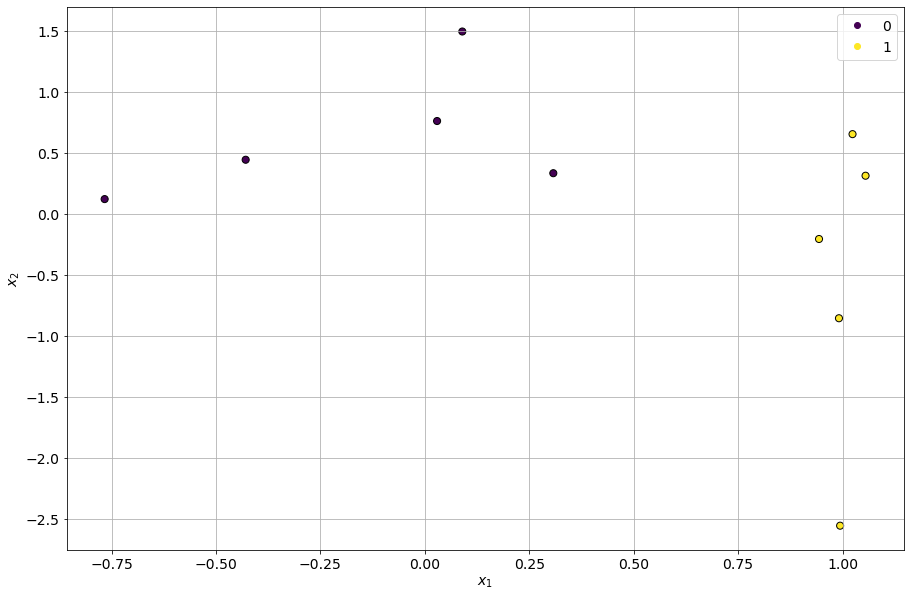

In [2]:
from sklearn.datasets import make_classification

X_data, y_data = make_classification(
    n_samples=10,
    n_features=2, 
    n_redundant=0,
    n_informative=1, 
    n_clusters_per_class=1,
    random_state=RANDOM_STATE
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [3]:
# TODO - напишите реализацию функции вычисления Джини
def gini_impurity(y):
    if(len(y)==0):
        return 0
    p0=len(y[y==1])/len(y)
    p1=len(y[y==0])/len(y)
    gini=p0*(1-p0)+p1*(1-p1)
    return gini

In [4]:
y1 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y3 = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
y4 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
assert gini_impurity(y1) == 0.5
assert gini_impurity(y2) == 0
assert gini_impurity(y3) == 0.32
assert gini_impurity(y4) == 0
assert gini_impurity(np.array([])) == 0

In [5]:
# TODO
def predict_v1(X):
    # Напишите реализацию функции предсказания
    #   решающего дерева с одним узлом
    #   разделение по признаку (x1) с порогом 0.5
    # *Не забывайте о размерности данных X
    y_pred=np.zeros(X[:,0].shape)
    y_pred[X[:,0]>0.5]=1
    return y_pred

In [6]:
# TEST
X = np.array([
    [1, 1],
    [2, 1],
    [0, 1],
])

assert np.all(predict_v1(X) == np.array([1, 1, 0]))

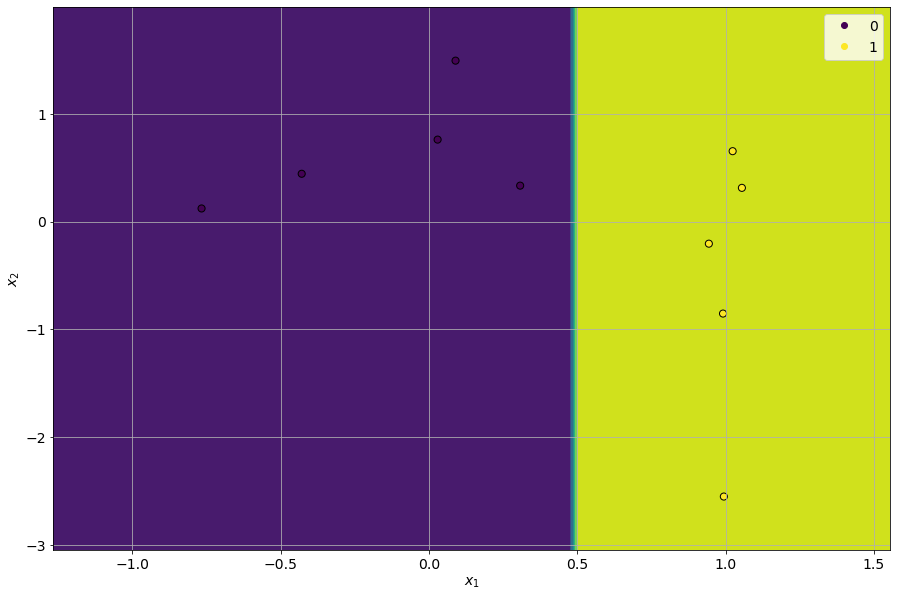

In [7]:

X = X_data
y_true = y_data

x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
space_X = np.c_[xx.ravel(), yy.ravel()]

y_pred = predict_v1(space_X)
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred)
pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
plt.show()

In [8]:
thresholds=[-0.5, 0.5, 1]
feature_index=0

X=X_data
y_true=y_data

gini_full=gini_impurity(y_true)
print(f'Gini full: {gini_full} | count: {len(y_true)}')

for threshold in thresholds:
    print(f'\tSplit by {threshold}')
    split_mask=X[:, feature_index] > threshold
    y_true_left=y_true[split_mask]
    y_true_right=y_true[~split_mask]
    
    gini_left=gini_impurity(y_true_left)
    gini_right=gini_impurity(y_true_right)

    print(f'\t\tGini left: {gini_left} | element count: {len(y_true_left)}')
    print(f'\t\tGini right: {gini_right} | element count: {len(y_true_right)}')

Gini full: 0.5 | count: 10
	Split by -0.5
		Gini left: 0.49382716049382713 | element count: 9
		Gini right: 0.0 | element count: 1
	Split by 0.5
		Gini left: 0.0 | element count: 5
		Gini right: 0.0 | element count: 5
	Split by 1
		Gini left: 0.0 | element count: 2
		Gini right: 0.46875 | element count: 8


In [9]:

thresholds=[-0.5, 0.5, 1]
feature_index=0

X=X_data
y_true=y_data

gini_full=gini_impurity(y_true)
print(f'Gini full: {gini_full}')

for threshold in thresholds:
    print(f'\tSplit by {threshold}')
    split_mask=X[:, feature_index] > threshold
    y_true_left=y_true[split_mask]
    y_true_right=y_true[~split_mask]
    
    gini_left=gini_impurity(y_true_left)
    gini_right=gini_impurity(y_true_right)

    print(f'\t\tGini left: {gini_left}')
    print(f'\t\tGini right: {gini_right}')
    
    weight_left = len(y_true_left)/len(y_true)
    weight_right = len(y_true_right)/len(y_true)
    weighted_gini = weight_left * gini_left + weight_right * gini_right
    print(f'\t\tGini after split: {weighted_gini}')
    print(f'\t\tGini gain: {gini_full-weighted_gini}')

Gini full: 0.5
	Split by -0.5
		Gini left: 0.49382716049382713
		Gini right: 0.0
		Gini after split: 0.4444444444444444
		Gini gain: 0.05555555555555558
	Split by 0.5
		Gini left: 0.0
		Gini right: 0.0
		Gini after split: 0.0
		Gini gain: 0.5
	Split by 1
		Gini left: 0.0
		Gini right: 0.46875
		Gini after split: 0.375
		Gini gain: 0.125


# Выбор лучшего разделения (сплита)

## Функция получения наилучшего распределения

In [10]:
def get_best_split(X, y_true):
    best_gini_gain = 0
    best_gini_impurity = 0
    best_feature_idx = 0
    best_threshold = 0

    for feature in range(X.shape[1]):
        for data in range(X.shape[0]):
            split_mask=X[:, feature]>X[data,feature]
            y_true_left=y_true[split_mask]
            y_true_right=y_true[~split_mask]

            gini_left=gini_impurity(y_true_left)
            gini_right=gini_impurity(y_true_right)
        
            weight_left=len(y_true_left)/len(y_true)
            weight_right=len(y_true_right)/len(y_true)
            weighted_gini=weight_left*gini_left+weight_right*gini_right
            gini_gain=gini_full-weighted_gini
            
            if (gini_gain>best_gini_gain):
                best_gini_gain=gini_gain
                best_threshold=X[data,feature]
                best_feature_idx=feature
                best_gini_impurity=weighted_gini

    return best_gini_impurity, best_feature_idx, best_threshold

In [11]:
# TEST
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([1, 1, 1, 1, 0, 0, 0, 1])

best_gini, best_feature_idx, best_threshold = get_best_split(X, y)

assert np.isclose(best_gini, 0.1875)
assert np.isclose(best_threshold, 4)
assert best_feature_idx == 0

In [12]:
best_gini, best_feature_idx, best_threshold = get_best_split(X_data, y_data)

print(
    f"Best gini impurity:\t{best_gini}",
    f"\nBest feature index:\t{best_feature_idx}",
    f"\nBest threshold value:\t{best_threshold}"
)

Best gini impurity:	0.0 
Best feature index:	0 
Best threshold value:	0.3074493077524587


## предсказание на разделения по признаку и порогу, заданными через аргументы

In [13]:
# TODO
def predict_v2(X, feature_index, threshold):
    # Напишите реализацию функции предсказания
    #   решающего дерева с одним узлом
    #   разделение по признаку (x1) с порогом 0.5
    # *Не забывайте о размерности данных X
    y_pred=np.zeros(X[:,feature_index].shape)
    y_pred[X[:,feature_index]>threshold]=1
    return y_pred

In [14]:
# TEST
X = X_data
y_true = y_data

y_pred = predict_v2(X, best_feature_idx, best_threshold)
assert np.all(y_true == y_pred)

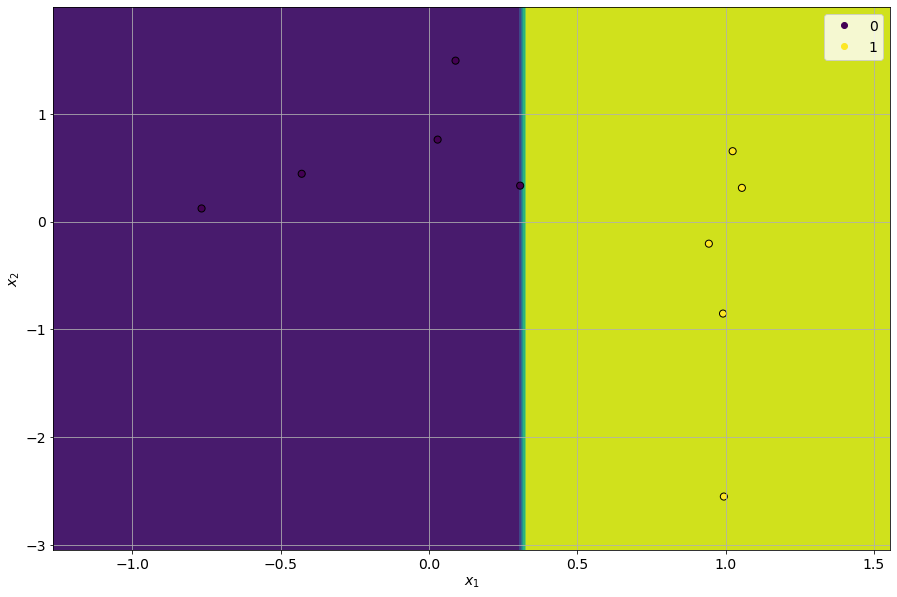

In [15]:
X = X_data
y_true = y_data

x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
space_X = np.c_[xx.ravel(), yy.ravel()]

y_pred = predict_v2(space_X, best_feature_idx, best_threshold)
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred)
pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
plt.show()

# Представление структуры дерева

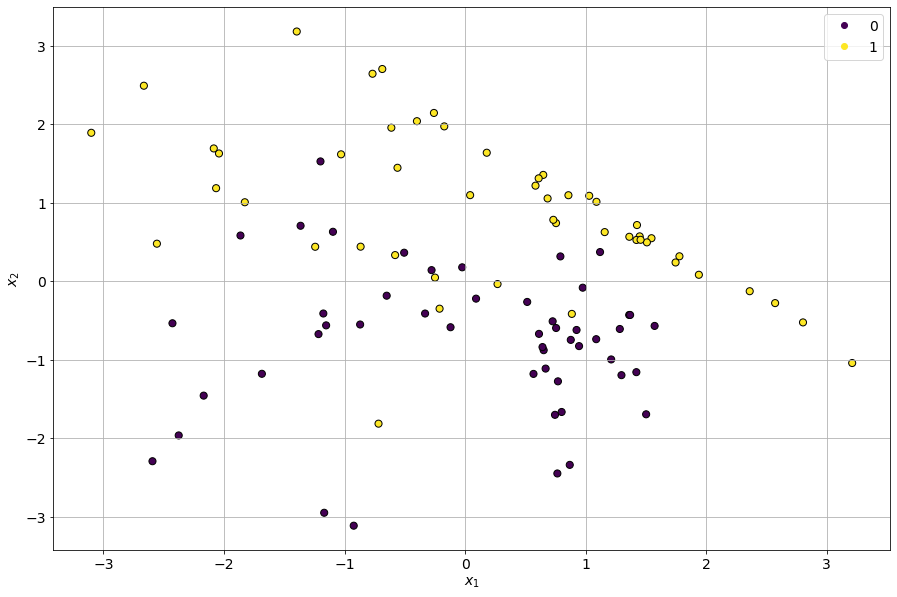

In [16]:
X_data, y_data = make_classification(
    n_samples=100,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=3
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

## Реализация листа дереве

In [17]:
class DecisionLeaf:
    def __init__(self, depth):
        ''' Конструктор класса
        Аргументы
        ---------
            depth: int
                глубина листа, на котором он располагается
        '''
        self.predict_class = None
        self.depth = depth

    def predict(self, X):
        ''' Функция предсказания листа

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний, заполненный значениями
                класса листа
        '''
        # TODO - напишите функцию предсказания
        y_pred=np.full(X.shape[0],self.predict_class)
        return y_pred

    def fit(self, X, y):
        ''' Метод находит в данных класс с наибольшим количеством записей
            и присваивает его листу как наиболее вероятно 
            предсказываемый класс
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # TODO - напишите функцию обучения
        # Выбираем из y наиболее часто встречающееся значение 
        #   и присваиваем self.predict_class
        #   это и будет предсказываемый класс листа
        all_class=np.unique(y)
        self.predict_class=0
        for i in all_class:
            if (len(y[y==self.predict_class])<len(y[y==i])):
                self.predict_class=i

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # TODO - напишите функцию возврата глубины, на которой находится лист
        return self.depth

    def print(self):
        ''' Вывод информации о листе '''
        print(f'{self.depth*" "}> Class {self.predict_class}')

In [18]:
# TEST
leaf = DecisionLeaf(1)

assert leaf.get_max_depth() == 1

X = np.array([1, 1, 1, 3]).reshape(-1, 1)
y = np.array([0, 1, 1, 2])
leaf.fit(X, y)

y_pred = leaf.predict(X)
y_true = np.array([1, 1, 1, 1])

assert np.all(y_pred == y_true)
assert np.all(y_pred.shape == y_true.shape)

## Реализация узла дерева

In [19]:
class DecisionNode:
    def __init__(self, depth, depth_limit, min_samples_split):
        ''' Конструктор класса
        Аргументы
        ---------
            depth: int
                глубина узла, на которой он располагается

            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла
        '''
        # Глубина, на которой узел находится
        self.depth = depth
        # Максимальная глубина
        self.depth_limit = depth_limit
        # Минимальное количество записей после сплита, чтобы создать узел
        self.min_samples_split = min_samples_split
        # Индекс признака, по которому узел делает разделение
        self.feature_index = None
        # Порог для разделения
        self.threshold = None

        # Аттрибуты для веток (правая ~ true, левая ~ false)
        self.true_elem = None
        self.false_elem = None
    
    def _create_new_element(self, X, y):
        ''' Метод создания нового элемента
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # Если в разметке остались уникальные классы - создаем лист
        if len(set(y)) == 1:
            return DecisionLeaf(self.depth+1)
        # TODO - допишите ограничения 
        #   на минимальное количество записей в данных
        #   и ограничение глубины
        if (len(y)<=self.min_samples_split):
            return DecisionLeaf(self.depth+1)
        if (self.depth>=self.depth_limit-1):
            return DecisionLeaf(self.depth+1)

        # Если так и не вернули лист - то возвращаем узел
        # У него увеличиваем глубину на 1 и пробрасываем инфу об ограничениях
        return DecisionNode(
            self.depth+1, 
            self.depth_limit,
            self.min_samples_split
        )

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        # TODO - напишите реализацию метода предсказания

        # Получите маску разделения
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        left_X=X[~mask]
        # Вот формируем вектор предсказания
        prediction = np.ndarray(X.shape[0], dtype=int)

        # Вот заполняем предсказания одной ветви
        prediction[~mask] = self.false_elem.predict(left_X)
        prediction[mask] = self.true_elem.predict(right_X)
        # Сделайте заполнения для второй ветви

        return prediction
    def get_best_split(self, X, y_true):
        best_gini_gain = 0
        best_gini_impurity = 0
        best_feature_idx = 0
        best_threshold = 0
        gini_full = gini_impurity(y_true)
        # TODO - дополните реализацию функции получения наилучшего разделения
        for feat in range(X.shape[1]):
            for dat in range(X.shape[0]):
                split_mask = X[:, feat] > X[dat,feat]
                y_true_left = y_true[split_mask]
                y_true_right = y_true[~split_mask]

                gini_left = gini_impurity(y_true_left)
                gini_right = gini_impurity(y_true_right)
            
                weight_left = len(y_true_left)/len(y_true)
                weight_right = len(y_true_right)/len(y_true)
                weighted_gini = weight_left * gini_left + weight_right * gini_right
                gini_gain=gini_full-weighted_gini
                if (gini_gain>best_gini_gain):
                    best_gini_gain=gini_gain
                    best_threshold=X[dat,feat]
                    best_feature_idx=feat
                    best_gini_impurity=weighted_gini
                    
        return best_feature_idx, best_threshold
    def fit(self, X, y):
        ''' Метод обучения узла
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # TODO - напишите реализацию метода обучения

        # Получите лучший сплит

        # Сохраните параметры сплита в self.feature_index и self.threshold
        self.feature_index, self.threshold = self.get_best_split(X, y)
        # Вот здесь мы создаем маску для деления
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        right_y = y[mask]

        self.true_elem = self._create_new_element(right_X, right_y)
        self.true_elem.fit(right_X, right_y)
        
        # Вам нужно сделать аналогичные действия для другой ветки
        
        left_X = X[~mask]
        left_y = y[~mask]

        self.false_elem = self._create_new_element(left_X, left_y)
        self.false_elem.fit(left_X, left_y)

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # Берем максимум от максимальной глубины по веткам
        return max([
            self.true_elem.get_max_depth(), 
            self.false_elem.get_max_depth()
        ])
    
    def print(self):
        ''' Вывод информации об узле '''
        print(f'{self.depth*" "}| {self.feature_index} > {self.threshold}')
        self.true_elem.print()
        self.false_elem.print()

In [20]:
# TEST
# Допустим, что узел на уровне 1 и максимальная глубина = 2
# Ограничение на минимальное количество уберем
node = DecisionNode(1, 2, 0)

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 0])
node.fit(X, y)

y_pred = node.predict(X)
y_true = np.array([0, 0, 1, 1, 1])

assert node.get_max_depth() == 2
assert np.all(y_pred == y_true)
assert np.all(y_pred.shape == y_true.shape)

In [21]:
class DecisionTree:
    def __init__(self, depth_limit, min_samples_split):
        ''' Конструктор класса
        
        Аргументы
        ---------
            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла
        '''
        self.root = DecisionNode(0, depth_limit, min_samples_split)

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        return self.root.predict(X)

    def fit(self, X, y):
        ''' Функция обучения

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных
        '''
        self.root.fit(X, y)

    def get_depth(self):
        ''' Получение информации о глубине дерева

        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        return self.root.get_max_depth()
    
    def print(self):
        ''' Вывод информации о дереве '''
        self.root.print()

In [22]:
# TEST
X = X_data
y_true = y_data

# Снимем ограничения дерева
# Не ограничиваем глубину и минимальное кол-во записей для узла
tree = DecisionTree(100, 0)
tree.fit(X,y_true)

assert tree.get_depth() == 6

In [23]:
tree.print()

| 1 > -0.18139161596997877
 | 1 > 0.3745125530056157
  | 0 > -1.096615964304849
   > Class 1
   | 0 > -1.2439900718574142
    > Class 0
    | 1 > 0.7091967442272131
     > Class 1
     | 1 > 0.4809573472262809
      > Class 0
      > Class 1
  | 0 > 1.1187257041052354
   > Class 1
   | 0 > -0.5810000805093616
    | 1 > 0.04912870149405335
     > Class 0
     | 0 > 0.26842648043447426
      > Class 0
      > Class 1
    > Class 1
 | 0 > 1.5712194041070418
  > Class 1
  | 1 > -0.42680267791699533
   | 0 > 0.5144652486005934
    > Class 1
    | 0 > -0.3325225345080114
     | 0 > -0.21235292176894527
      > Class 0
      > Class 1
     > Class 0
   | 1 > -1.8111327315138177
    > Class 0
    | 1 > -1.9609526821607552
     > Class 1
     > Class 0


## Построение пространства решений

In [24]:
def plot_tree_decision_space(X, y_true, tree):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
    xx, yy = np.meshgrid(x1_vals, x2_vals)
    space_X = np.c_[xx.ravel(), yy.ravel()]

    y_pred = tree.predict(space_X)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
    plt.show()

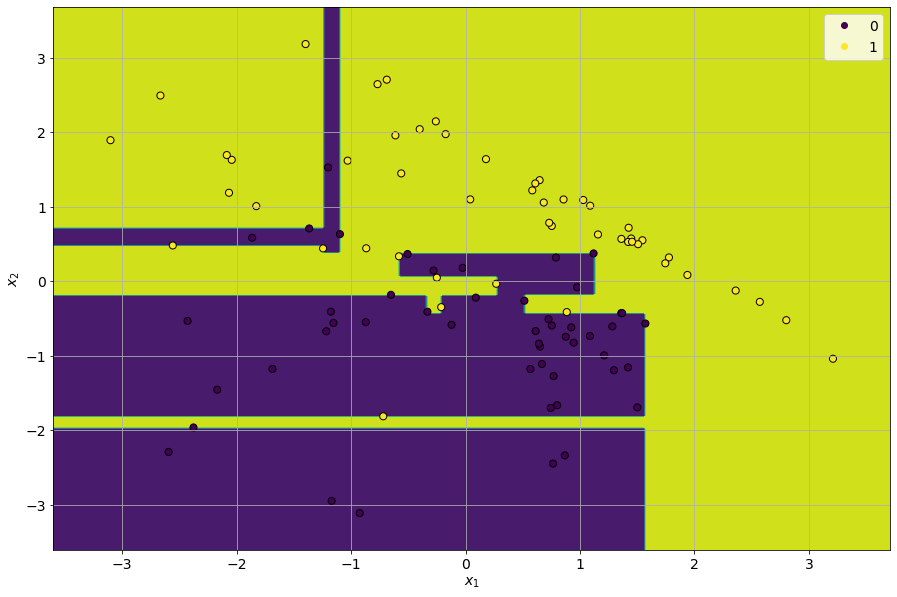

In [25]:
plot_tree_decision_space(X, y_true, tree)

In [26]:
y_pred=tree.predict(X)
(y_pred!=y_true).sum()

0

## Произведите разделение на обучение/тест выборки, обучите дерево и отобразите матрицу ошибок.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7
X = X_data
y_true = y_data
X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y_true, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE,
    stratify=y_true
)

# Снимем ограничения дерева
# Не ограничиваем глубину и минимальное кол-во записей для узла
tree = DecisionTree(100, 0)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

print(f'precision,recall: {precision_recall_fscore_support(y_test,y_pred)}')

precision,recall: (array([0.75      , 0.78571429]), array([0.8       , 0.73333333]), array([0.77419355, 0.75862069]), array([15, 15], dtype=int64))


## Определите наилучшие показатели для дерева с ограничением по показателю f1 кроссвалидацией путем перебора двух параметров. Постройте таблицу и отобразите ее с помощью seaborn.heatmap().

In [28]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 

def cross_val_score_f1(model, k_folds, X, y):
    f1_values=[]
    # TODO - напишите функцию получения оценки кросс-валидацией
    skf=StratifiedKFold(n_splits=k_folds)
    for train_index, test_index in skf.split(X, y):
        model.fit(X[train_index,:],y[train_index])
        y_pred=model.predict(X[test_index,:])
        f1=f1_score(y[test_index],y_pred)
        f1_values.append(f1)
        
    return np.mean(f1_values)

In [29]:
X=X_data
y_true=y_data
new_table=pd.DataFrame(index=range(0, 20, 2),columns=range(1, 7))
new_data=np.ndarray([len(range(1, 7)),len(range(0, 20, 2))])

for depth_limit in range(1, 7):
    f1_values = []
    for min_samples in range(0, 20, 2):
        tree = DecisionTree(depth_limit=depth_limit, min_samples_split=min_samples)
        f1_value = cross_val_score_f1(tree, 5, X, y_true)
        f1_values.append(f1_value)
    new_table[depth_limit]=f1_values
# TODO - Добавьте сохранение данных и отображение таблицы
new_table.head()

,1,2,3,4,5,6
0,0.795433,0.850284,0.841284,0.765140,0.797777,0.820798
2,0.795433,0.850284,0.841284,0.765140,0.797777,0.820798
4,0.795433,0.850284,0.841284,0.765140,0.765140,0.788048
6,0.795433,0.850284,0.841284,0.778647,0.778647,0.778647
8,0.795433,0.850284,0.841284,0.804101,0.804101,0.804101


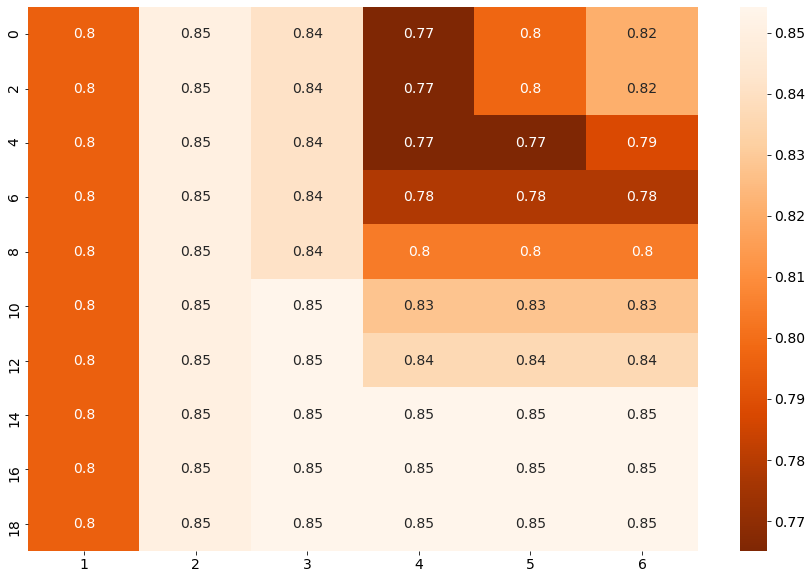

In [30]:
sns.heatmap(new_table, annot=True, cmap='Oranges_r')
plt.show()

# Ансамблирование (Ensemble) и Бэггинг (bagging)

## Для практики реализуем метод генерации бутстрэп выборок из исходных данных:

In [31]:
def generate_bootstrap_sets(X, D):
    ''' Генерация D выборок из исходных данных

    Параметры
    ---------
    X: [n_samples, n_features]
        Исходные данные
    
    D: int
        Количество выборок для генерации

    Возвращает
    ----------
    boostrapped_sets: list
        Список, состоящий из бутстрэп-выборок данных размером [n_samples, n_features]
    ''' 

    bootstrapped_sets = []
    for i in range(D):
        seq=np.random.choice(range(X.shape[0]),X.shape[0])
        mass=np.ndarray(X.shape)
        for i in range(len(seq)):
            mass[i,:]=X[seq[i],:]
        bootstrapped_sets.append(mass)
# TODO - напишите реализацию генератора выборок
    return bootstrapped_sets

In [32]:
X = np.array([
    [1, 2, 3],
    [5, 7, 9],
    [-2, 0, 3],
    [-1, 9, 2],
])

boostrapped_Xs = generate_bootstrap_sets(X, 3)

assert len(boostrapped_Xs) == 3
assert boostrapped_Xs[0].shape == X.shape
assert boostrapped_Xs[1].shape == X.shape
assert boostrapped_Xs[2].shape == X.shape

## Бэггинг над решающими деревьями

In [33]:
class BaggingDecisionTrees:
    def __init__(self, ensemble_size, depth_limit, min_samples_split):
        self.ensemble_size = ensemble_size
        self.depth_limit = depth_limit
        self.min_samples_split = min_samples_split
        # TODO - Напишите код создания необходимого количества решающих деревьев
        self.trees = []
        for i in range(ensemble_size):
            tree=DecisionTree(depth_limit=self.depth_limit, min_samples_split=self.min_samples_split)
            self.trees.append(tree)
    def predict(self, X):
        predicts=[]
        result_predictions=np.ndarray(X.shape[0], dtype=int)
        # TODO - Получите предсказания каждого дерева в массив predicts
        for tree in self.trees:
            predict=tree.predict(X)
            predicts.append(predict)
        # А вот так мы получим голосование по каждой записи
        # Так как у нас predict - это массив (n_samples, ensemble_size),
        #   то по каждой записи проводим голосование 
        #   и выбираем наиболее частый класс среди предсказаний моделей
        predicts=np.array(predicts).T  
        for i_s in range(predicts.shape[0]):
            (uniques, counts)=np.unique(predicts[i_s], return_counts=True)
            most_frequent=uniques[np.argmax(counts)]
            # TODO - осталось заполнить правильное значение 
            #   в векторе предсказаний
            result_predictions[i_s]=most_frequent
        return result_predictions
    def generate_bootstrap_sets(self,X, D):
        bootstrapped_sets=[]
        for i in range(D):
            seq=np.random.choice(range(X.shape[0]),X.shape[0])
            mass=np.ndarray(X.shape)
            for i in range(len(seq)):
                mass[i,:]=X[seq[i],:]
            bootstrapped_sets.append(mass)
        # TODO - напишите реализацию генератора выборок
        return bootstrapped_sets
    def fit(self, X, y):
        # Так мы объединили данные для генерации выборок
        Xy = np.c_[X, y]
        # TODO - добавьте здесь генерацию выборов
        boostrapped_Xy = self.generate_bootstrap_sets(Xy, self.ensemble_size)
        for i, Xy in enumerate(boostrapped_Xy):
            X = Xy[:, :-1]
            y = Xy[:, -1]
            # TODO - здесь добавьте обучение i-го дерева
            self.trees[i].fit(X,y)

In [34]:
X = X_data
y_true = y_data

bag_tree = BaggingDecisionTrees(
    ensemble_size=10, 
    depth_limit=3, 
    min_samples_split=2
)
bag_tree.fit(X, y_true)
y_pred = bag_tree.predict(X)

assert len(bag_tree.trees) == 10
assert np.all(y_pred.shape == y_true.shape)

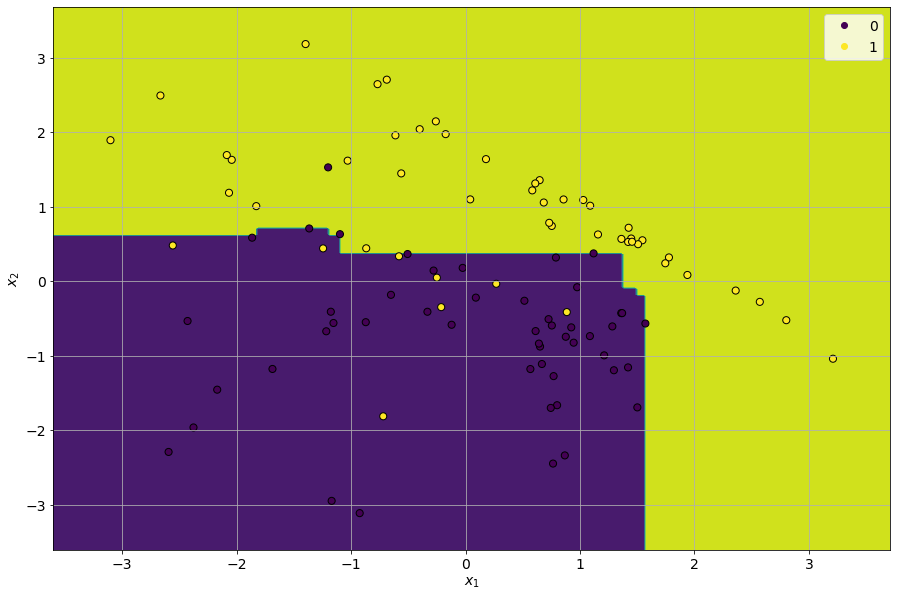

In [35]:
plot_tree_decision_space(X, y_true, bag_tree)

## Определите наилучшие параметры для бэггинга над решающими деревьями путем перебора трех параметров. Для каждого параметра зафиксируйте список проверяемых значений и в трех циклах перебором подставляйте значения и определите лучшие для данной модели.

In [36]:
table=[]
for ensemble_size in range(1,20):
    bag_tree=BaggingDecisionTrees(
    ensemble_size=ensemble_size, 
    depth_limit=3, 
    min_samples_split=2
  )
    bag_tree.fit(X, y_true)
    y_pred = bag_tree.predict(X)
    f1=f1_score(y_true,y_pred)
    table.append(f1)
    
ensemble_size=range(1,20)[np.argmax(table)]
table=[]

for depth_limit in range(1,20):
    bag_tree=BaggingDecisionTrees(
    ensemble_size=ensemble_size, 
    depth_limit=depth_limit, 
    min_samples_split=2
  )
    bag_tree.fit(X, y_true)
    y_pred=bag_tree.predict(X)
    f1=f1_score(y_true,y_pred)
    table.append(f1)
    
depth_limit=range(1,20)[np.argmax(table)]
table=[]
for min_samples_split in range(1,10):
    bag_tree=BaggingDecisionTrees(
    ensemble_size=ensemble_size, 
    depth_limit=depth_limit, 
    min_samples_split=min_samples_split
  )
    bag_tree.fit(X, y_true)
    y_pred=bag_tree.predict(X)
    f1=f1_score(y_true,y_pred)
    table.append(f1)
    
min_samples_split=range(1,10)[np.argmax(table)]
print(f'ensemble_size,depth_limit,min_samples_split: {ensemble_size,depth_limit,min_samples_split}')

bag_trees=BaggingDecisionTrees(
    ensemble_size=ensemble_size, 
    depth_limit=depth_limit, 
    min_samples_split=min_samples_split
)

bag_tree.fit(X, y_true)
y_pred=bag_tree.predict(X)
f1=f1_score(y_true,y_pred)
print(f'f1: {f1}')

ensemble_size,depth_limit,min_samples_split: (10, 11, 3)
f1: 0.9494949494949495


## Поиск гиперпараметров методом сетки

In [37]:
# TODO - реализуйте поиск лучшего варианта бэггинга над решающими деревьями методом случаного выбора гиперпараметров
min_samples_splits=np.arange(1,10)
ensemble_sizes=np.arange(1,20)
depth_limits=np.arange(1,20)
f1_mass=[]
parameter_mass=[]
for i in range(50):
    ensemble_size=np.random.choice(ensemble_sizes,1)[0]
    depth_limite=np.random.choice(depth_limits,1)[0]
    min_samples_split=np.random.choice(min_samples_splits,1)[0]
    bag_tree = BaggingDecisionTrees(
        ensemble_size=ensemble_size, 
        depth_limit=depth_limit, 
        min_samples_split=min_samples_split
    )
    bag_tree.fit(X, y_true)
    y_pred=bag_tree.predict(X)
    f1=f1_score(y_true,y_pred)
    f1_mass.append(f1)
    parameter_mass.append([ensemble_size,depth_limite,min_samples_split])
    
print(f'parameters: {parameter_mass[np.argmax(f1_mass)]}')
print(f'f1:{np.max(f1_mass)}')


parameters: [16, 10, 2]
f1:1.0


# Случайный лес

In [38]:
# TODO - сделайте новую реализацию в этой ячейке
class DecisionNode:
    def __init__(self, depth, depth_limit, min_samples_split,max_features):
        ''' Конструктор класса
        Аргументы
        ---------
            depth: int
                глубина узла, на которой он располагается

            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла
        '''
        self.max_features=max_features
        # Глубина, на которой узел находится
        self.depth = depth
        # Максимальная глубина
        self.depth_limit = depth_limit
        # Минимальное количество записей после сплита, чтобы создать узел
        self.min_samples_split = min_samples_split
        # Индекс признака, по которому узел делает разделение
        self.feature_index = None
        # Порог для разделения
        self.threshold = None

        # Аттрибуты для веток (правая ~ true, левая ~ false)
        self.true_elem = None
        self.false_elem = None
    
    def _create_new_element(self, X, y):
        ''' Метод создания нового элемента
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # Если в разметке остались уникальные классы - создаем лист
        if len(set(y)) == 1:
            return DecisionLeaf(self.depth+1)
        # TODO - допишите ограничения 
        #   на минимальное количество записей в данных
        #   и ограничение глубины
        if (len(y)<=self.min_samples_split):
            return DecisionLeaf(self.depth+1)
        if (self.depth>=self.depth_limit-1):
            return DecisionLeaf(self.depth+1)

        # Если так и не вернули лист - то возвращаем узел
        # У него увеличиваем глубину на 1 и пробрасываем инфу об ограничениях
        return DecisionNode(
            self.depth+1, 
            self.depth_limit,
            self.min_samples_split,
            self.max_features
        )

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        # TODO - напишите реализацию метода предсказания

        # Получите маску разделения
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        left_X=X[~mask]
        # Вот формируем вектор предсказания
        prediction = np.ndarray(X.shape[0], dtype=int)

        # Вот заполняем предсказания одной ветви
        prediction[~mask] = self.false_elem.predict(left_X)
        prediction[mask] = self.true_elem.predict(right_X)
        # Сделайте заполнения для второй ветви

        return prediction
    def get_best_split(self, X, y_true):
        best_gini_gain = 0
        best_gini_impurity = 0
        best_feature_idx = 0
        best_threshold = 0
        gini_full = gini_impurity(y_true)
        # TODO - дополните реализацию функции получения наилучшего разделения
        for fear in range(X.shape[1]):
            for dat in range(X.shape[0]):
                split_mask = X[:, fear] > X[dat,fear]
                y_true_left = y_true[split_mask]
                y_true_right = y_true[~split_mask]

                gini_left = gini_impurity(y_true_left)
                gini_right = gini_impurity(y_true_right)
            
                weight_left = len(y_true_left)/len(y_true)
                weight_right = len(y_true_right)/len(y_true)
                weighted_gini = weight_left * gini_left + weight_right * gini_right
                gini_gain=gini_full-weighted_gini
                if (gini_gain>best_gini_gain):
                    best_gini_gain=gini_gain
                    best_threshold=X[dat,fear]
                    best_feature_idx=fear
                    best_gini_impurity=weighted_gini
        return best_feature_idx, best_threshold
    def fit(self, X, y):
        ''' Метод обучения узла
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # TODO - напишите реализацию метода обучения

        # Получите лучший сплит

        # Сохраните параметры сплита в self.feature_index и self.threshold
        split_feature_indices = np.random.choice(range(X.shape[1]), self.max_features, replace=False)
        best_feature_idx, self.threshold = self.get_best_split(X[:, split_feature_indices], y)
        # Вот здесь мы создаем маску для деления
        self.feature_index = split_feature_indices[best_feature_idx]
        
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        right_y = y[mask]

        self.true_elem = self._create_new_element(right_X, right_y)
        self.true_elem.fit(right_X, right_y)
        
        # Вам нужно сделать аналогичные действия для другой ветки
        
        left_X = X[~mask]
        left_y = y[~mask]

        self.false_elem = self._create_new_element(left_X, left_y)
        self.false_elem.fit(left_X, left_y)

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # Берем максимум от максимальной глубины по веткам
        return max([
            self.true_elem.get_max_depth(), 
            self.false_elem.get_max_depth()
        ])
    
    def print(self):
        ''' Вывод информации об узле '''
        print(f'{self.depth*" "}| {self.feature_index} > {self.threshold}')
        self.true_elem.print()
        self.false_elem.print()

In [39]:
class DecisionTree:
    def __init__(self, depth_limit, min_samples_split, max_features):
        ''' Конструктор класса
        Аргументы
        ---------
            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла

            max_features: int
                максимальное количество признаков для деления
        '''
        self.root = DecisionNode(0, depth_limit, min_samples_split, max_features)

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        return self.root.predict(X).astype(int)

    def fit(self, X, y):
        ''' Функция предсказания

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        self.root.fit(X, y)

    def get_depth(self):
        ''' Получение информации о глубине дерева
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        return self.root.get_max_depth()
    
    def print(self):
        ''' Вывод информации о дереве '''
        self.root.print()

Реализация случайного леса

In [40]:
class RandomForest:
    def __init__(self, ensemble_size, depth_limit, min_samples_split, max_features):
        self.ensemble_size = ensemble_size
        self.trees = []
        # TODO - Напишите код создания необходимого количества решающих деревьев
        for i in range(ensemble_size):
            tree = DecisionTree(depth_limit, min_samples,max_features)
            self.trees.append(tree)

    def predict(self, X):
        predicts = []
        result_predictions = np.ndarray(X.shape[0], dtype=int)

        # TODO - Получите предсказания каждого дерева в массив predicts
        for tree in self.trees:
            y_pred=tree.predict(X)
            predicts.append(y_pred)
        # А вот так мы получим голосование по каждой записи
        # Так как у нас predict - это массив (n_samples, ensemble_size),
        #   то по каждой записи проводим голосование 
        #   и выбираем наиболее частый класс среди предсказаний моделей
        predicts = np.array(predicts).T
        for i_s in range(predicts.shape[0]):
            (uniques, counts) = np.unique(predicts[i_s], return_counts=True)
            most_frequent = uniques[np.argmax(counts)]
            # TODO - осталось заполнить правильное значение 
            #   в векторе предсказаний
            result_predictions[i_s] =  most_frequent

        return result_predictions
    def generate_bootstrap_sets(self,X, D):
        bootstrapped_sets=[]
        for i in range(D):
            seq=np.random.choice(range(X.shape[0]),X.shape[0])
            mass=np.ndarray(X.shape)
            for i in range(len(seq)):
                mass[i,:]=X[seq[i],:]
            bootstrapped_sets.append(mass)
        # TODO - напишите реализацию генератора выборок
        return bootstrapped_sets
    def fit(self, X, y):
        # Так мы объединили данные для генерации выборок
        Xy = np.c_[X, y]
        # TODO - добавьте здесь генерацию выборов
        boostrapped_Xy = self.generate_bootstrap_sets(Xy, self.ensemble_size)
        for i, Xy in enumerate(boostrapped_Xy):
            X = Xy[:, :-1]
            y = Xy[:, -1]
            # TODO - здесь добавьте обучение i-го дерева
            self.trees[i].fit(X,y)

In [41]:
X = X_data
y_true = y_data

rf_clfr = RandomForest(
    ensemble_size=10, 
    depth_limit=3, 
    min_samples_split=2,
    max_features=int(np.sqrt(X.shape[1]))
)
rf_clfr.fit(X, y_true)

y_pred = rf_clfr.predict(X)

assert len(rf_clfr.trees) == 10
assert np.all(y_pred.shape == y_true.shape)

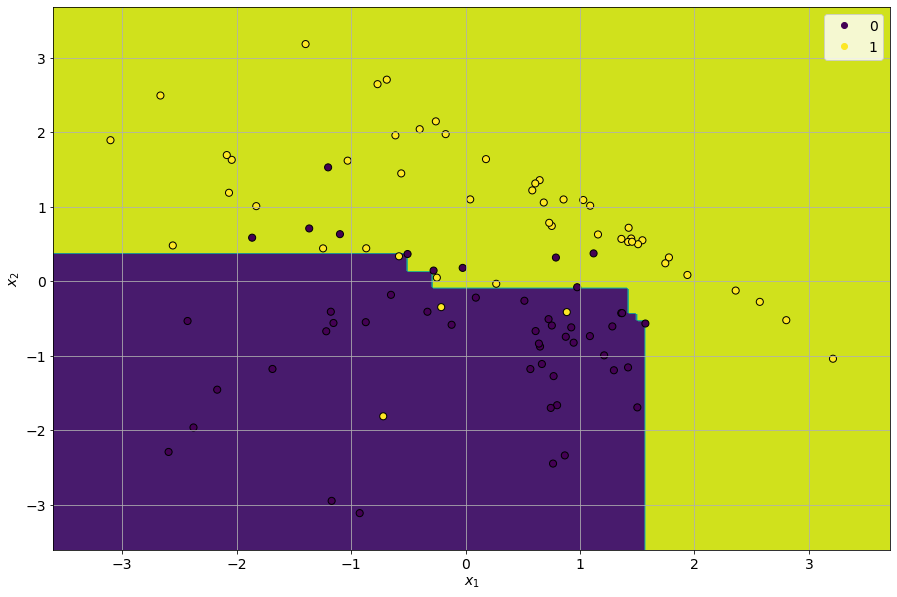

In [42]:
plot_tree_decision_space(X, y_true, rf_clfr)

## Найдите лучшие параметры для случайного леса и сравните с лучшим вариантом модели бэггинга над решающими деревьями. Параметр max_features менять не требуется. Для оценки как всегда используйте кросс-валидацию.

In [43]:
# TODO - реализуйте поиск лучшего варианта бэггинга над решающими деревьями методом случаного выбора гиперпараметров
f1_mass=[]
parameter_mass=[]
min_samples_splits=np.arange(1,10)
ensemble_sizes=np.arange(1,20)
depth_limits=np.arange(1,20)
for i in range(50):
    ensemble_size=np.random.choice(ensemble_sizes,1)[0]
    depth_limite=np.random.choice(depth_limits,1)[0]
    min_samples_split=np.random.choice(min_samples_splits,1)[0]
    forest = RandomForest(
        ensemble_size=ensemble_size, 
        depth_limit=depth_limit, 
        min_samples_split=min_samples_split,
        max_features=int(np.sqrt(X.shape[1]))
    )
    f1_val=cross_val_score_f1(forest, 5, X, y_true)
    f1_mass.append(f1_val)
    parameter_mass.append([ensemble_size,depth_limite,min_samples_split])
print(f'parameters: {parameter_mass[np.argmax(f1_mass)]}')
print(f'f1:{np.max(f1_mass)}')

parameters: [13, 6, 8]
f1:0.8603258145363408


## найти лучшие параметры для моделей решающего дерева и случайного леса для следующих данных:

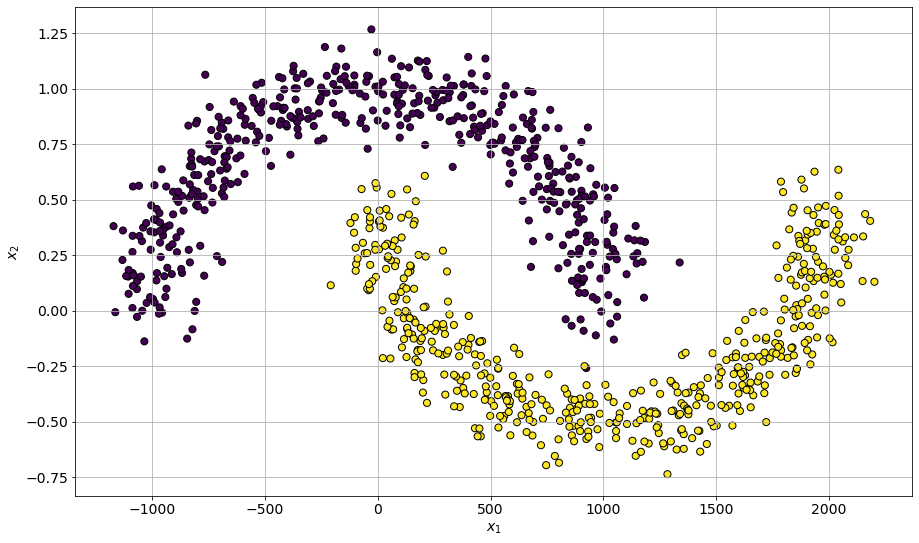

In [44]:

from sklearn.datasets import make_moons

X_data, y_data = make_moons(
    n_samples=1000,
    noise=.1,
    random_state=RANDOM_STATE
)
X_data[:,0] *= 1000

plt.figure(figsize=[15, 9])
pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)

In [45]:
X=X_data
y_true=y_data
f1_mass=[]
parameter_mass=[]
min_samples_splits=np.arange(1,10)
ensemble_sizes=np.arange(1,20)
depth_limits=np.arange(1,20)
for i in range(5):
    ensemble_size=np.random.choice(ensemble_sizes,1)[0]
    depth_limite=np.random.choice(depth_limits,1)[0]
    min_samples_split=np.random.choice(min_samples_splits,1)[0]
    forest = RandomForest(
        ensemble_size=ensemble_size, 
        depth_limit=depth_limit, 
        min_samples_split=min_samples_split,
        max_features=int(np.sqrt(X.shape[1]))
    )
    f1_val = cross_val_score_f1(forest, 5, X, y_true)
    f1_mass.append(f1_val)
    parameter_mass.append([ensemble_size,depth_limite,min_samples_split])
print(f'parameters: {parameter_mass[np.argmax(f1_mass)]}')
print(f'f1:{np.max(f1_mass)}')

parameters: [18, 4, 8]
f1:0.9860591044179043


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_data)

# Стандартизация данных
X_scaled = scaler.transform(X_data)
X=X_scaled
y_true=y_data
min_samples_splits=np.arange(1,10)
ensemble_sizes=np.arange(1,20)
depth_limits=np.arange(1,20)
for i in range(5):
    ensemble_size=np.random.choice(ensemble_sizes,1)[0]
    depth_limite=np.random.choice(depth_limits,1)[0]
    min_samples_split=np.random.choice(min_samples_splits,1)[0]
    forest = RandomForest(
        ensemble_size=ensemble_size, 
        depth_limit=depth_limit, 
        min_samples_split=min_samples_split,
        max_features=int(np.sqrt(X.shape[1]))
    )
    f1_val = cross_val_score_f1(forest, 5, X, y_true)
    f1_mass.append(f1_val)
    parameter_mass.append([ensemble_size,depth_limite,min_samples_split])
print(f'parameters: {parameter_mass[np.argmax(f1_mass)]}')
print(f'f1:{np.max(f1_mass)}')

parameters: [10, 6, 1]
f1:0.9861246463881252


## решить задачу регрессии с помощью дерева

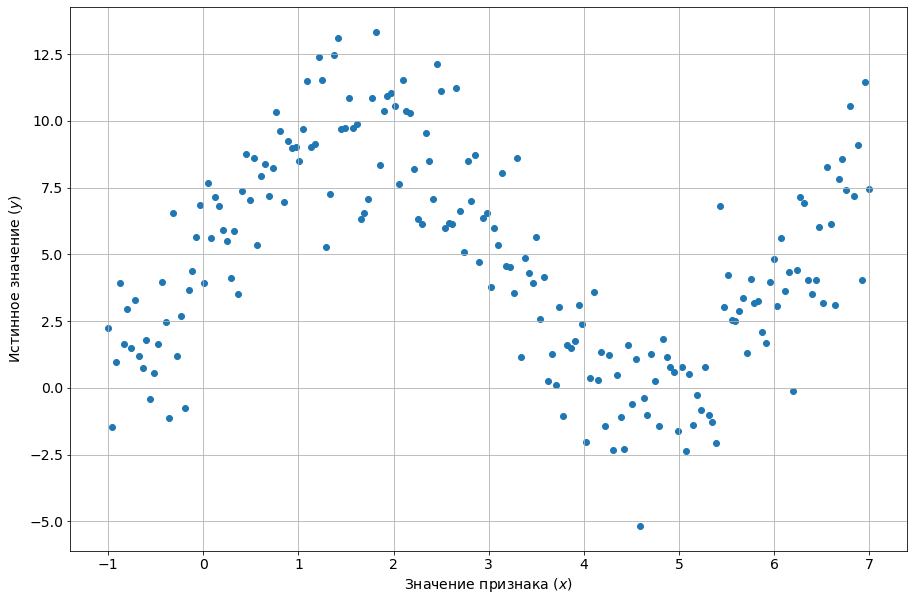

In [53]:
X_data = np.linspace(-1, 7, 200)[:, None]
y_data = np.sin(X_data[:,0])*5 + np.random.normal(size=X_data.shape[0])*2 + 5

# Посмотрим на данные
plt.scatter(X_data[:,0], y_data)
plt.grid(True)
plt.xlabel('Значение признака ($x$)')
plt.ylabel('Истинное значение ($y$)')
plt.show()

In [61]:
class DecisionNodeReg:
    def __init__(self, depth, depth_limit, min_samples_split):
        ''' Конструктор класса
        Аргументы
        ---------
            depth: int
                глубина узла, на которой он располагается

            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла
        '''

        # Глубина, на которой узел находится
        self.depth = depth
        # Максимальная глубина
        self.depth_limit = depth_limit
        # Минимальное количество записей после сплита, чтобы создать узел
        self.min_samples_split = min_samples_split
        # Индекс признака, по которому узел делает разделение
        self.feature_index = None
        # Порог для разделения
        self.threshold = None

        # Аттрибуты для веток (правая ~ true, левая ~ false)
        self.true_elem = None
        self.false_elem = None
    
    def _create_new_element(self, X, y):
        ''' Метод создания нового элемента
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        #   на минимальное количество записей в данных
        if len(set(y))<=self.min_samples_split:
            return DecisionLeafReg(self.depth+1)
        #   и ограничение глубины
        if len(set(y))>=self.depth_limit:
            return DecisionLeafReg(self.depth+1)


        # Если так и не вернули лист - то возвращаем узел
        # У него увеличиваем глубину на 1 и пробрасываем инфу об ограничениях
        return DecisionNodeReg(
            self.depth+1, 
            self.depth_limit,
            self.min_samples_split
        )

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        # TODO - напишите реализацию метода предсказания

        # Получите маску разделения
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        left_X=X[~mask]

        # Вот формируем вектор предсказания
        prediction = np.ndarray(X.shape[0], dtype=int)

        # Вот заполняем предсказания одной ветви
        prediction[~mask] = self.false_elem.predict(left_X)
        
        # Сделайте заполнения для второй ветви
        prediction[mask] = self.true_elem.predict(right_X)

        return prediction

    
    def get_best_split(self,X,y):
        X_train=X
        y_train=y
        best_mse_gain=-10000
        best_mse_impurity = 0
        best_feature_idx = 0
        best_threshold = 0
        all_gain=[]
        mse_full=np.mean((np.mean(y_train)-y_train)**2)
        for features in range(X_train.shape[1]):
            for entry in range(X_train.shape[0]):
                split_mask = X_train[:, features] > X_train[entry,features]
                y_true_left = y_train[split_mask]
                y_true_right = y_train[~split_mask]
        
                if (len(y_true_left)!=0)&(len(y_true_right)!=0):
                    mse_left =np.mean((np.mean(y_true_left)-y_true_left)**2)
                    mse_right =np.mean((np.mean(y_true_right)-y_true_right)**2)

                    weight_left = len(y_true_left)/len(y_train)
                    weight_right = len(y_true_right)/len(y_train)

                    weighted_mse = weight_left * mse_left + weight_right * mse_right
                    mse_gain=mse_full-weighted_mse
                    all_gain.append(mse_gain)
            
                    if (mse_gain>best_mse_gain):
                        best_mse_gain=mse_gain
                        best_threshold=X[entry,features]
                        best_feature_idx=features
                        best_mse_impurity=weighted_mse
        return best_feature_idx, best_threshold
    
    def fit(self, X, y):
        ''' Метод обучения узла
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # TODO - напишите реализацию метода обучения

        # Получите лучший сплит

        # Сохраните параметры сплита в self.feature_index и self.threshold
        self.feature_index, self.threshold = self.get_best_split(X, y)
        # Вот здесь мы создаем маску для деления
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        right_y = y[mask]

        self.true_elem = self._create_new_element(right_X, right_y)
        self.true_elem.fit(right_X, right_y)
        
        # Вам нужно сделать аналогичные действия для другой ветки
        left_X = X[~mask]
        left_y = y[~mask]

        self.false_elem = self._create_new_element(left_X, left_y)
        self.false_elem.fit(left_X, left_y)

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # Берем максимум от максимальной глубины по веткам
        return max([
            self.true_elem.get_max_depth(), 
            self.false_elem.get_max_depth()
        ])
    
    def print(self):
        ''' Вывод информации об узле '''
        print(f'{self.depth*" "}| {self.feature_index} > {self.threshold}')
        self.true_elem.print()
        self.false_elem.print()

In [62]:
class DecisionLeafReg:
    def __init__(self, depth):

        self.predict_class = None
        self.depth = depth

    def predict(self, X):
        ''' Функция предсказания листа

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний, заполненный значениями
                класса листа
        '''
        # TODO - напишите функцию предсказания
        y_pred=np.full(X.shape[0],self.predict_class)
        return y_pred

    def fit(self, X, y):
        ''' Метод находит в данных класс с наибольшим количеством записей
            и присваивает его листу как наиболее вероятно 
            предсказываемый класс
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        self.predict_class=np.mean(y)

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # TODO - напишите функцию возврата глубины, на которой находится лист
        return self.depth

    def print(self):
        ''' Вывод информации о листе '''
        print(f'{self.depth*" "}> Class {self.predict_class}')

In [63]:
class DecisionTreeReg:
    def __init__(self, depth_limit, min_samples_split,max_features):
        ''' Конструктор класса
        
        Аргументы
        ---------
            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла
        '''
        self.root = DecisionNodeReg(0, depth_limit, min_samples_split)

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        return self.root.predict(X)

    def fit(self, X, y):
        ''' Функция обучения

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных
        '''
        self.root.fit(X, y)

    def get_depth(self):
        ''' Получение информации о глубине дерева

        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        return self.root.get_max_depth()
    
    def print(self):
        ''' Вывод информации о дереве '''
        self.root.print()

In [64]:
class RandomForestReg:
    def __init__(self, ensemble_size, depth_limit, min_samples_split, max_features):
        self.ensemble_size = ensemble_size
        self.trees = []
        # TODO - Напишите код создания необходимого количества решающих деревьев
        for i in range(ensemble_size):
            tree = DecisionTreeReg(depth_limit, min_samples,max_features)
            self.trees.append(tree)

    def predict(self, X):
        predicts = []
        result_predictions = np.zeros_like(X.shape[0], dtype=int)

        # TODO - Получите предсказания каждого дерева в массив predicts
        for tree in self.trees:
            y_pred=tree.predict(X)
            result_predictions=result_predictions+y_pred
        # А вот так мы получим голосование по каждой записи
        # Так как у нас predict - это массив (n_samples, ensemble_size),
        #   то по каждой записи проводим голосование 
        #   и выбираем наиболее частый класс среди предсказаний моделей
        result_predictions = result_predictions/self.ensemble_size

        return result_predictions
    def generate_bootstrap_sets(self,X, D):
        bootstrapped_sets=[]
        for i in range(D):
            seq=np.random.choice(range(X.shape[0]),X.shape[0])
            mass=np.ndarray(X.shape)
            for i in range(len(seq)):
                mass[i,:]=X[seq[i],:]
            bootstrapped_sets.append(mass)
        # TODO - напишите реализацию генератора выборок
        return bootstrapped_sets
    def fit(self, X, y):
        # Так мы объединили данные для генерации выборок
        Xy = np.c_[X, y]
        # TODO - добавьте здесь генерацию выборов
        boostrapped_Xy = self.generate_bootstrap_sets(Xy, self.ensemble_size)
        for i, Xy in enumerate(boostrapped_Xy):
            X = Xy[:, :-1]
            y = Xy[:, -1]
            # TODO - здесь добавьте обучение i-го дерева
            self.trees[i].fit(X,y)

In [75]:
TRAIN_RATIO = 0.7
X = X_data
y_true = y_data
X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y_true, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)
forest = RandomForestReg(
    ensemble_size=20, 
    depth_limit=80, 
    min_samples_split=4,
    max_features=int(1)
  )
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
y_pred

array([ 2.35,  2.95,  4.  ,  5.9 ,  5.45,  5.9 ,  2.2 , -0.2 ,  2.2 ,
       -0.2 ,  8.5 ,  0.35,  5.9 , -0.2 ,  7.95,  2.2 ,  4.2 ,  0.3 ,
        7.4 ,  9.4 ,  5.9 , -0.2 ,  7.85,  2.45,  8.5 ,  0.35,  5.9 ,
        5.9 ,  0.35,  7.85,  2.35,  8.15, -0.2 ,  3.25,  3.05,  6.15,
        0.3 ,  2.2 ,  7.95,  4.  , -0.2 ,  8.5 ,  3.65,  1.95,  2.45,
        8.5 ,  2.2 ,  9.4 ,  0.35, -0.2 ,  9.4 ,  0.35,  5.9 ,  5.9 ,
       -0.2 ,  3.05,  3.65,  2.45,  7.75,  8.15])

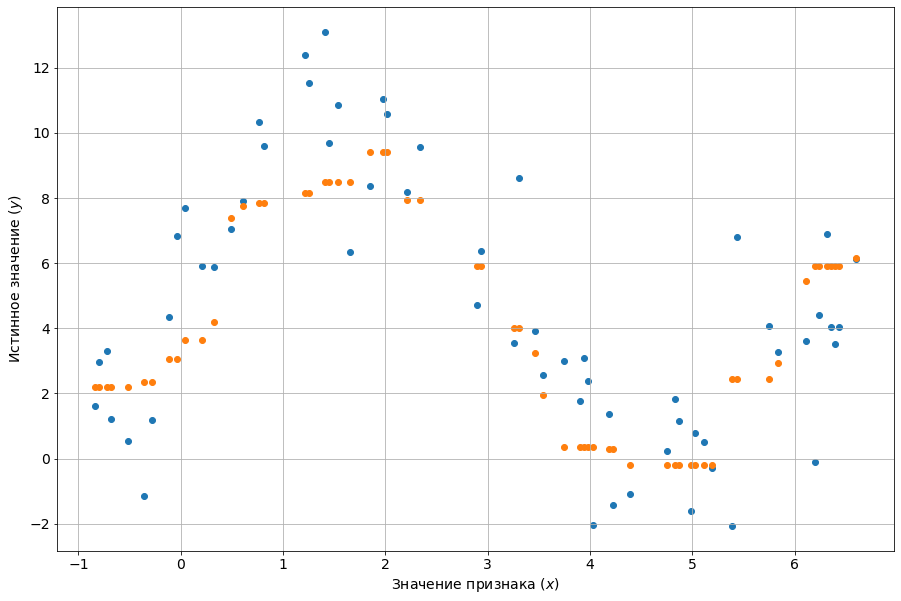

In [76]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test,y_pred)
plt.grid(True)
plt.xlabel('Значение признака ($x$)')
plt.ylabel('Истинное значение ($y$)')
plt.show()

Если увеличивать глубину дерева, то можно добиться более качественного повторения исходнй зависимости, но тогда будет риск переобучиться, что тоже не есть хорошо.

# Выводы-задания

**1. Что делает дерево, может ли оно заменить задачу регрессии?** - решающие деревьями позволяют восстанавливать нелинейные зависимости произвольной сложности. Решающие деревья хорошо описывают процесс принятия решения. Решающее дерево может заменить задачу регресси, если зависимости перестают быть линейными и становятся сильно нелинейными.

**2. Зачем нужен порог дереву?** - Для определени больше или меньше значение определенного признака чем какой-то поро, чтоб в дальнейшем принять решение по какой ветке идти.

**3. Как производится оценка разделения дерева?** - Вывод разницы между исходным показателем и после разделения называется "прирост Джини" (Gini Gain). Если показатель стал меньше, значит в разделении стало меньше примесей. То есть, чем больше прирост Джини, тем лучше разделение.

**4. Зачем нужно останавливать рекурсию?** - Рекурсия процесс бесконечный, поэтому необходимо задавать определенные условия выхода из нее. В рамках данной практике выход из рекурсии осуществляется созданием листов, или если превышена глубина, или закончились данные, или ели обльше нет уникальных классов. Соответственно дерево будет делиться на узлы если ни одно из этих условий не выполнено.

**5. Почему переобученное дерево - это плохо?** - переобучение плохо тем, что модель перестает видеть зависимость в данных и начинает просто запоминать данные, что приводит к тому, что на новых данных будет много ошибок.

**6. Чем случайный лес отличается от ансамбля деревьев? И отличается ли? Почему важно это знать?** - Отличие случайного леса от ансамбля деревьев состоит в методе разделения узла в дереве. Случайный лес вводит ограничение: для получения сплита рассматриваются не все признаки из данных, а только F(<M). Для задач классификации F=sqrt(M), для задач регрессии F=M/3. При ансамблировании полагают, что наилучшего сплита рассматриваются все N записей и все M признаков, чтобы найти наилучшее разделение.

**7. Что делает бэггинг с решающими деревьями?** - Бэггинг работает следующим образом: если имеются данные с N записями, тогда создается D бутстрэп выборок (каждая размером N) и обучается D моделей, каждая на своем кусочке.

**8. Нужна ли стандартизация/нормализация признаков для деревьев? Почему?** - Станндартизация требуется, т.к применяется взвешенная примесь Джинни. И чтобы избежать перевешивания определенного признака нужно применять нормализацию.

# Вопросы

**1. Чем отличаются корень, узлы и листья у дерева? Почему внезапно такая ассоциация с деревьями?** Корень - это основа всех основ (как у дерева) - самый первый узел. В узлы дерева приходят данные, которые затем разделяются в соответсвии с заданным порогом. Листья это конкретне конечные классы, которые присваиваются значениям. Такая ветящаяся структура сильно похожа на на настоящее дерево.

**2. Зачем нужен порог дереву?** - Порог нужен для разделения данных в узлах и определения данных к определенному классу

**3. Когда в дереве много примесей - это хорошо, плохо или ещё как-то?** - Примеси это не есть хорошо. Их надо минимизировать. Как раз порог следует выбирать так, чтобы минимизировать примеси в классе.

**4. Чем опасна рекурсия и как держать её в узде?** - Если не остановить (или не корректно задать условия выхода),то может произойти зацикливание. Решение проблемы - задание верных условий выхода из рекурсии.

**5. Когда дерево может точно переобучиться?** - Если нет ограничений. Дерево переобучится, если не наложить ограничения на глубину дерева, или на уникальность классов.

**6. Что лучше одно супер-дерево или много нормальных таких деревьев?** - Много нормальных деревьев. Тут следует обратитья к идее ансамблирования. Решающее дерево при сильном ограничении не позволяет достаточно разделить пространство, чтобы отразить зависимость в данных, а при слабом ограничении растет и запоминает данные, что приводит к переобучению. Группа таких классификаторов же может дать хороший результат, даже если каждый из них будет совершать ошибки, то усреднение результатов может дать более точный ответ.

**7. Как связан бэггинг и ансамблирование?** - Бэггинг является одним из простых методов ансамблирования. Так как бэггинг из одной выборки размера N создает D выборок размера N.И получается, вместо одного дерева, их уже целый ансамбль.

**8. Что такое бутстрэпинг?** - Идея бутстрэпинга заключается в следующем, что мы берем случайную запись из данных и определяем ее в новую выборку, но при этом не исключаем из исходных данных, то есть эта запись может попасть в эту же выборку снова или в другие выборки.

**9. Что такое показатель энтропии и как его можно использовать при построении деревьев?** - В теории информации энтропией называется мера неоднородности множества (в нашем случае — данных), т.е. чем менее однородно множество, тем выше энтропия.Энтропию можно применять при выборе порога дерева, чтобы грамотно разбивать данные на классы с минимальным количеством примесей.

**10. Почему такое название "обучение с учителем"? Где этот учитель прячется?** - под учителем будем понимать некоторую обучающую выборку, которая будем являться желаемой целью нашего обучения. По сути, процесс обучения с учителем это процесс, когда мы пытаемся достичь этой желаемой выборки (например, изменяя веса целевого функционала). 

**11. Можно ли переобучить модель линейной регрессии?** - в линейной регрессии это называется немного иначе - overfit - когда сложность модели больше чем нужно. Это приводит к тому, что модель становится слишком заточенной на обучающие данные.